In [1]:
## Import required modules
# %matplotlib allows plots to appear directly in the notebook
%matplotlib inline             
import numpy as np              # required for basic calculations
import pandas as pd             # required for data analysis (reading files)
from scipy import stats         # required for statistics
from __future__ import division # allows floating number division
import matplotlib.pylab as plt  # required for plotting
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from IPython.display import display
import pandas as pd
import datetime

import statsmodels.tsa.stattools as st
import statsmodels.graphics.tsaplots as tsaplots # tsaplots.plot_acf

C:\Users\Johan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:

# Read in dataframe
prec_rampur = pd.read_csv('Datasets/prec_Rampur.csv',sep=',',index_col = 'Time',na_values=-99.9,parse_dates=True)
prec_rampur.head()

# Read in dataframe
temp_rampur = pd.read_csv('Datasets/temp_Rampur.csv',sep=',',index_col = 'Time',na_values=-99.9,parse_dates=True)
temp_rampur['date'] = temp_rampur.index
temp_rampur.head()

,Tmax,Tmin,date
Time,,,
1967-01-01,NaN,NaN,1967-01-01
1967-01-02,NaN,NaN,1967-01-02
1967-01-03,NaN,NaN,1967-01-03
1967-01-04,NaN,NaN,1967-01-04
1967-01-05,NaN,NaN,1967-01-05


### Data series mean, var, etc.

Check for stationarity. (Lecture 12)

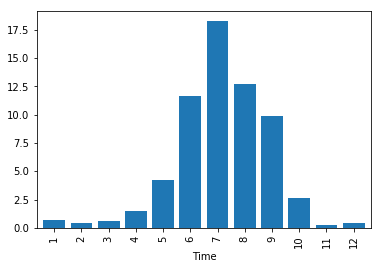

In [3]:
# Monthly means + plots for "first" and "second" period. No real difference in precipitation distribution for the two periods.
# Precipitation
meanprec_rampur=prec_rampur.groupby(prec_rampur.index.month).mean()
#meanprec_rampur.plot(kind='bar',width=0.8,legend=False)
#plt.show()

meanprec_rampur=prec_rampur['1967':'1989'].groupby(prec_rampur['1967':'1989'].index.month).mean()
meanprec_rampur.plot(kind='bar',width=0.8,legend=False)
plt.show()

meanprec_rampur=prec_rampur['1990':'2011'].groupby(prec_rampur['1990':'2011'].index.month).mean()
#meanprec_rampur.plot(kind='bar',width=0.8,legend=False)
#plt.show()

In [13]:
# Temperature
meantemp_rampur = temp_rampur.copy(deep=True)

meantemp_rampur['month'] = meantemp_rampur['date'].dt.strftime('%b')

mtm_rampur=meantemp_rampur.groupby(meantemp_rampur['Tmax'].index.month).mean()
mtm_rampur['date'] = mtm_rampur.index
mtm_rampur['month'] = mtm_rampur['date'].index.month

display(mtm_rampur)
#meantempmax_rampur.plot(kind='bar',width=0.8,legend=False,color='b')
#plt.xlabel('Months')
plt.show()

AttributeError: 'Int64Index' object has no attribute 'month'

### Trends (Lecture 12)

1. Seasonal decompose

2. Trend tests(Wald-Wolfowitz, Mann-Kendall, Linear-regression method)

3. Jumps?

In [ ]:
# In some cases, a simple decomposition using moving averages is possible
from statsmodels.tsa.seasonal import seasonal_decompose

# to deal with gaps in the time series, let's go to monthly averages and interpolate any remaining gaps
prec_month=prec_Rampur.resample('1M').mean().interpolate().dropna()
prec_month.plot()
plt.show()


# here, assuming an additive model: Y[t] = T[t] + S[t] + e[t]
decomposition=seasonal_decompose(prec_month['Precipitation (mm)'])

decomposition.plot()
plt.legend()
plt.show()

## Future prediction

Rating curve 

### Covariagram

### Multiple linear regression model (Lecture 10)

1. Use some independent variables to estimate a dependent variable.
Prec og disc stor sammenheng?
Forskjell i plassering av data stasjon, kan kanskje bruke spatial interpolation elns?

2. Principal component analysis

### Frequency analysis (Lecture 5)

* Introduction
    - Aim
    - Assumptions
* Analytical method
    - Frequency factor
    - Examples
    
### Confidence interval (Lecture 6)
* Constructing confidence intervals

* Hypothesis testing?

### Testing the goodness of fit of data to probability distributions (Lecture 7)

1. Chi-square test
2. Kolmogorov-Smirnoov test

### Moments, covariance, correlation etc (Lecture 2)

Probably part of other tasks

#### Climate and topography

#### Lapsrate 

#### Plots
1. Plot whole time series and trend line
2. Plot monthly means
3. Seasonal decompose?
4. 

#### Probability distribution
1. Take monthly means of for example precipitation or temperature. 
2. Try to fit a probability distribution to the monthly mean.
3. Test goodness of fit by Chi-square or Kolmogorov-Smirnoov test.

#### Frequency analysis
1. Create a set of peak values(f.ex. one value per year or season)
2. Plot peak values in a probability of exceedence plot by ranking etc.
3. Fit data to probability distribution
4. Create probability of exceedence plot for years "larger" than our dataset by using the probability distribution

#### Regression model
1. Correlation for picking best variable
2. Try to create a model for precip or discharge based on a independent variable discharge or precip.
3. Is R2 large? I.e. good model? Does addition of temperature give any increase?

